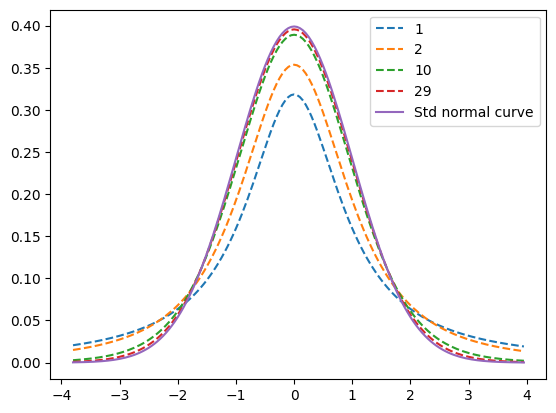

1-cdf gives : 0.12639805893063705
same as : 0.12639805893063707
0.02275013194817921 0.0227501319481792


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import numpy as np
import pandas as pd
x = np.arange(-3.8,4,1/20) #a random population
for i in [1, 2,10, 29]:
    #plotting all the t-dist curves(pdf gives prob desnity func)
    plt.plot(x, t.pdf(x, i),'--',label=i)
#plotting a regular normal curve
plt.plot(x, norm.pdf(x), label='Std normal curve')
plt.legend(loc = 'upper right')
plt.show()
print("1-cdf gives :", 1-t.cdf(1.59, 2))
print('same as :', t.sf(1.59, 2))
print(1-norm.cdf(2), norm.sf(2))

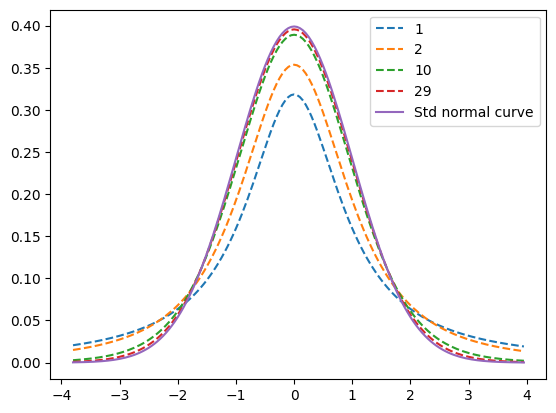

1-cdf gives : 0.12639805893063705
same as : 0.12639805893063707
0.02275013194817921 0.0227501319481792


In [3]:
x = np.arange(-3.8,4,1/20) #a random population
for i in [1, 2,10, 29]:
    #plotting all the t-dist curves(pdf gives prob desnity func)
    plt.plot(x, t.pdf(x, i),'--',label=i)
#plotting a regular normal curve
plt.plot(x, norm.pdf(x), label='Std normal curve')
plt.legend(loc = 'upper right')
plt.show()
print("1-cdf gives :", 1-t.cdf(1.59, 2))
print('same as :', t.sf(1.59, 2))
print(1-norm.cdf(2), norm.sf(2))

Confidence Level 99.00004355246759


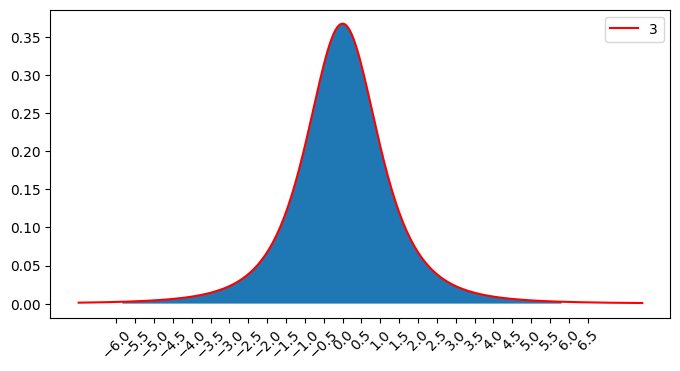

In [5]:
x = np.arange(-7, 8, 1/20)
def ci(t_score, n):
    plt.figure(figsize=(8,4))
    #gives the whole area under the graph
    area = t.cdf(t_score, n - 1) - t.cdf(-t_score, n - 1)
    print('Confidence Level', area * 100)
    plt.plot(x, t.pdf(x, n - 1), color= 'red',label= n - 1)
    #to fill from -t end to +t end
    section = np.arange(-t_score, t_score, 1/20.)
    plt.fill_between(section, t.pdf(section, n - 1))
    plt.xticks(np.arange(-6,7,0.5), rotation = 45)
    plt.legend(loc = 'upper right')
    plt.show()
ci(5.841, 4)

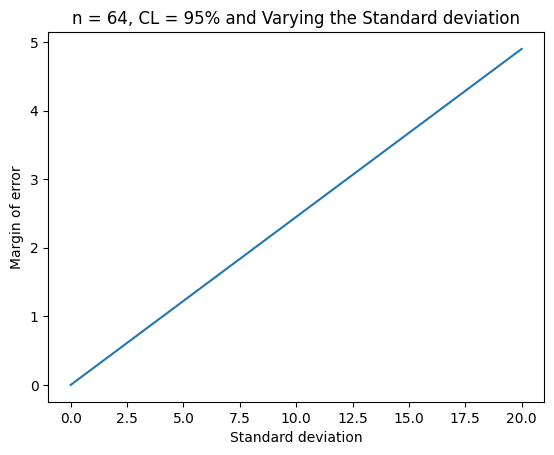

In [7]:
#sigma = 10
import math
z_score = 1.96 # 95% CL
n = 64
moe = [] #list of margin of errors
x = range(0,21) # Varying SD from 0 to 20
for sd in x:
    moe.append(z_score * sd/math.sqrt(n))
plt.plot(x, moe)
plt.title('n = 64, CL = 95% and Varying the Standard deviation')
plt.ylabel('Margin of error')
plt.xlabel('Standard deviation')
plt.show()

Text(0.5, 0, 'sample size')

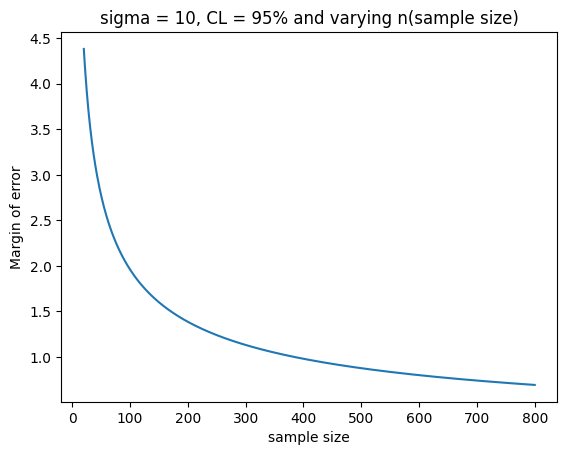

In [8]:
sigma = 10
z_score = 1.96 # 95% CL
moe = []
x = range(20,801) # varying sample size from 20 to 800
for n in x:
    moe.append(1.96 * sigma/math.sqrt(n))
plt.plot(x, moe)
plt.title('sigma = 10, CL = 95% and varying n(sample size)')
plt.ylabel('Margin of error')
plt.xlabel('sample size')

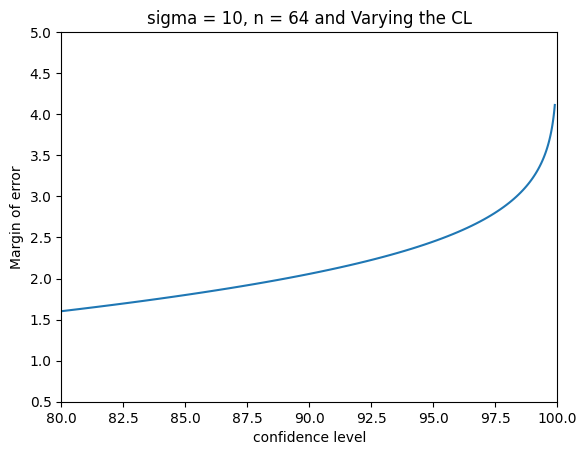

In [9]:
sigma = 10
#z_score = 1.96 # 95% CL
n = 64
def prob(z1,z2):
    return (norm.cdf(z2) - norm.cdf(z1))

z_alphaby2 = np.linspace(norm.ppf(0.10), norm.ppf(0.0005), 100)
z_alphaby2 = z_alphaby2 * -1
#calculating margin of error
moe = z_alphaby2 * sigma/math.sqrt(n)
#getting the CL
x = []
for i in range(0, len(z_alphaby2)):
    x.append(prob(-1 * z_alphaby2[i], z_alphaby2[i]))
#getting the CL in %
x = np.array(x) * 100
plt.plot(x, moe)
plt.ylabel('Margin of error')
plt.ylim(0.5,5)
plt.xlim(80,100)
plt.title('sigma = 10, n = 64 and Varying the CL')
plt.xlabel('confidence level')
plt.show()

In [11]:
from math import sqrt
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False

alpha = 0.05
sample_mean = 585
pop_mean = 558
sample_size = 100
std_dev = 139
print('H0 : =', pop_mean)

print('H1 : !=', pop_mean)

print('alpha value is :', alpha, '\n')
reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : = 558
H1 : != 558
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 1.9424460431654675 

Failed to reject NULL hypothesis


In [14]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
alpha = 0.05
sample_mean = 108
pop_mean = 100
sample_size = 36
std_dev = 15
print('H0 : <=', pop_mean)

print('H1 : >', pop_mean)

print('alpha value is :', alpha, '\n')
reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
    #variation with different parameters can be shown here

H0 : <= 100
H1 : > 100
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 3.2 

Reject NULL hypothesis
